<a href="https://colab.research.google.com/github/Cesarloz/Ejemplo-CANVAS/blob/master/red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import scipy as sc 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

[1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1
 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0
 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1
 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 1 1 1 0 0 1 1 

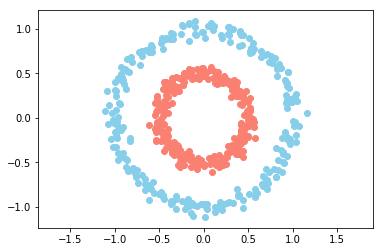

In [ ]:
n=500
p=2
X,Y= make_circles(n_samples=n,factor=0.5, noise=0.05)
print(Y)
plt.scatter(X[Y==0,0],X[Y==0,1],c="skyblue")
plt.scatter(X[Y==1,0],X[Y==1,1],c="salmon")
plt.axis("equal")
plt.show()


In [ ]:
class neural_layer():
  def __init__(self,n_conn,n_neur,act_f):
    self.act_f=act_f
    self.b=np.random.rand(1,n_neur)*2-1
    self.W=np.random.rand(n_conn,n_neur)*2-1



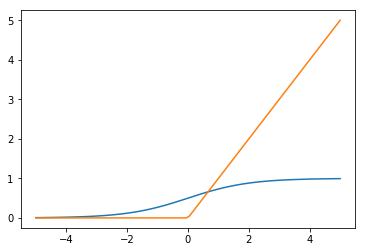

In [ ]:
sign=(lambda x:1/(1+np.e**(-x)),
      lambda x:x*(1-x))

relu= lambda x:np.maximum(0,x)

_x=np.linspace(-5,5,100)
plt.plot(_x,sign[0](_x))
plt.plot(_x,relu(_x))

In [ ]:
l0=neural_layer(p,4,sign)
l1=neural_layer(4,8,sign)
topology=[p,4,8,16,8,4,1]
def create_nn(topology,act_f):
  nn=[]
  for l,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1],act_f))
  return nn



In [ ]:

topology=[p,4,8,16,8,4,1]
neural_net=create_nn(topology,sign)

l2_cost=(lambda Yp,Yr:np.mean((Yp-Yr)**2),
         lambda Yp,Yr: (Yp-Yr))

def train(neural_net,X,Y,l2_cost,lr=0.5,train=True):
  out=[(None,X)]
  for l, layer in enumerate(neural_net):
    z= out[-1][1]@neural_net[l].W + neural_net[l].b
    a=neural_net[l].act_f[0](z)
    out.append((z,a))

  print(l2_cost[0](out[-1][1],Y))
  if train:
    deltas =[]
    for l in reversed(range(0,len(neural_net))):
      z=out[l+1][0]
      a=out[l+1][0]
      print(a.shape)
      if l==len(neural_net)-1:
        deltas.insert(0,l2_cost[1](a,Y)*neural_net[l].act_f[1](a))
      else:
        deltas.insert(0,deltas[0]@neural_net[l+1].W * neural_net[l].act_f[1](a))
    
      neural_net[1].b=neural_net[1].b - np.mean(deltas[0],axis=0,keepdims=True)*lr



      #else


train(neural_net,X,Y,l2_cost,0.5)




0.2674503879744004
(500, 1)
(500, 4)
(500, 8)
(500, 16)
(500, 8)
(500, 4)
